In [1]:
import pandas as pd
import numpy as np

In [2]:
""" Read data to be used """
# In this example, a dataset about spamming is used
data = pd.read_csv('spambase.csv',sep=",")
data.head()

""" Some preprocessing on data """
# Number of features
m = data.shape[1]
# Remove unwanted features
X = data.iloc[:,0:48]
y = data.iloc[:,(m-1):]

# Turn data into onehot format
X_onehot = pd.get_dummies(X)

In [3]:
from sklearn.model_selection import train_test_split
""" Splitting training and testing data """
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.25, random_state=33)

In [4]:
print("% of spams (train): ", np.mean(y_train))
print("% of spams (test): ", np.mean(y_test))

% of spams (train):  Spam    0.402899
dtype: float64
% of spams (test):  Spam    0.367507
dtype: float64


In [5]:
""" Import BRF classifiers """
from BoostedRandomForest import BoostedRandomForest
""" Example usage """
#brf = BoostedRandomForest()
#rf = BoostedRandomForest(weight_update=False, boosting=False)
#brf_wout_update = BoostedRandomForest(weight_update=False)

' Example usage '

In [6]:
""" Default parameters """
# Max number of trees
brf_params = {'T': 250,
              'depth_max': 20,
              'weight_update': True,
              'boosting': True,
             }


In [7]:
""" Without Early Stopping """
brf_nonstop_params = brf_params
brf_nonstop_clf = BoostedRandomForest(**brf_nonstop_params)

In [8]:
brf_nonstop_clf.fit(X_train, y_train)

In [9]:
# Training accuracies 
brf_train_accs = brf_nonstop_clf.train_accs
print(len(brf_train_accs))
# Epsilons
brf_eps = brf_nonstop_clf.all_eps
print(len(brf_eps))
# Alphas
brf_alphas = brf_nonstop_clf.all_alphas
print(len(brf_alphas))

192
250
250


In [14]:
""" Early Stopping with eps=[1e-20, 0.5]"""
brf_es_params = brf_params
brf_es_params['eps_ub'] = 0.5
brf_es_params['eps_lb'] = 1e-20
brf_es_params['eps_exceed_limit'] = 5
# Disable for evaluate performance after early stopping
brf_es_params['early_stop'] = False 


brf_es_clf = BoostedRandomForest(**brf_es_params)

In [15]:
brf_es_clf.fit(X_train, y_train)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [20]:
# Training accuracies 
brf_train_accs = brf_es_clf.train_accs
print("Len of accs: ", len(brf_train_accs))
# Epsilons
brf_eps = brf_es_clf.all_eps
print("Len of eps: ", len(brf_eps))
# Alphas
brf_alphas = brf_es_clf.all_alphas
print("Len of alphs: ", len(brf_alphas))
stop_index = brf_es_clf.stop_index
print("Stop index: ", stop_index)

Len of accs:  194
Len of eps:  250
Len of alphs:  250
Stop index:  87


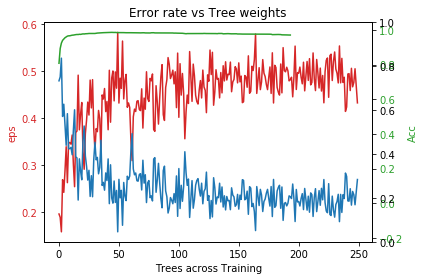

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots()
plt.title("Error rate vs Tree weights")
ax1.set_xlabel('Trees across Training')

# Epsilons
color = 'tab:red'
ax1.set_ylabel('eps', color=color)
ax1.plot(brf_eps, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
# Alphas
color = 'tab:blue'
ax2.set_ylabel('alphas', color=color)  
ax2.plot(brf_alphas, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Accuracy
ax3 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Acc', color=color)  
ax2.plot(brf_train_accs, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Early stop


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()